In [4]:
import pandas as pd

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from mlxtend.evaluate import bootstrap_point632_score
import seaborn as sns
from bioinfokit.visuz import cluster

In [5]:
#loading data from url
mcd_data = pd.read_csv("https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv")

In [6]:
mcd_data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [7]:
mcd_data.shape

(1453, 15)

In [8]:
mcd_data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [9]:
#selecting categorical columns
cat_columns = mcd_data.select_dtypes(['object']).columns
cat_columns = cat_columns[0:11]
cat_columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting'],
      dtype='object')

In [10]:
#categorical -> numbers
for col in cat_columns:
    update = mcd_data[col] == 'Yes'
    mcd_data.loc[update,col] = 1
    update = mcd_data[col] == 'No'
    mcd_data.loc[update,col] = 0

In [11]:
mcd_data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [12]:
#displaying column wise means
for col in cat_columns:
    print(col," : ",round(mcd_data[col].mean(),2))

yummy  :  0.55
convenient  :  0.91
spicy  :  0.09
fattening  :  0.87
greasy  :  0.53
fast  :  0.9
cheap  :  0.6
tasty  :  0.64
expensive  :  0.36
healthy  :  0.2
disgusting  :  0.24


In [13]:
#selecting only review attributes
sel_data=mcd_data.drop(columns=['Like','Age','VisitFrequency','Gender'])

In [14]:
sel_data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


C:\Users\Mahesh Tiria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Second Principal Component')

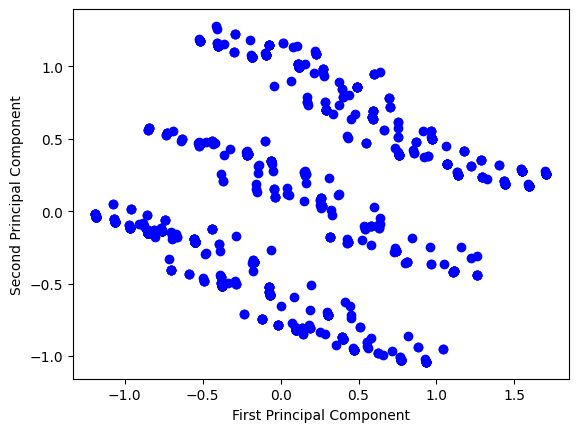

In [16]:
#PCA on sel_data
pca = PCA(n_components = 11)
pca.fit_transform(sel_data)
x_pca = pca.transform(sel_data.values)

#plotting PC1 vs PC2

for i in range(len(x_pca[:,0])):

    x=x_pca[i,0]
    y=x_pca[i,1]
    plt.plot(x,y,'bo')
    #plt.text(x * (1 + 0.01), y * (1 + 0.01),cat_columns[i],fontsize=12)
    
plt.xlabel('First Principal Component')
    
plt.ylabel('Second Principal Component')

names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)

In [21]:
components = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
components_df = pd.DataFrame.from_dict(dict(zip(pc_list, components)))
components_df['variable'] = sel_data.columns.values
components_df = components_df.set_index('variable')
components_df


C:\Users\Mahesh Tiria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


In [34]:
x_pca.shape

(1453, 3)

Text(0, 0.5, 'Inertia')

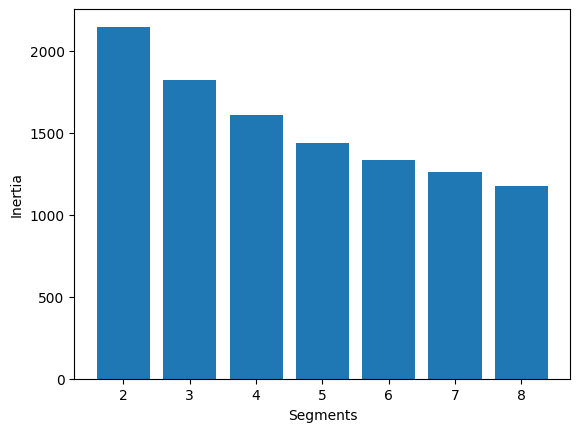

In [21]:
#running kmeans on various k values
inertia=[]
segment=[]
kvalues=range(2,9)

for k in kvalues:
    kmeans = KMeans(
        init='random',
        n_clusters=k,
        n_init=10,
        max_iter=300,
        random_state=42
    )
    kmeans.fit(sel_data)
    temp = vars(kmeans)
    
    inertia.append(kmeans.inertia_)
    segment.append(k)

plt.bar(segment,inertia)
plt.xlabel('Segments')
plt.ylabel('Inertia')

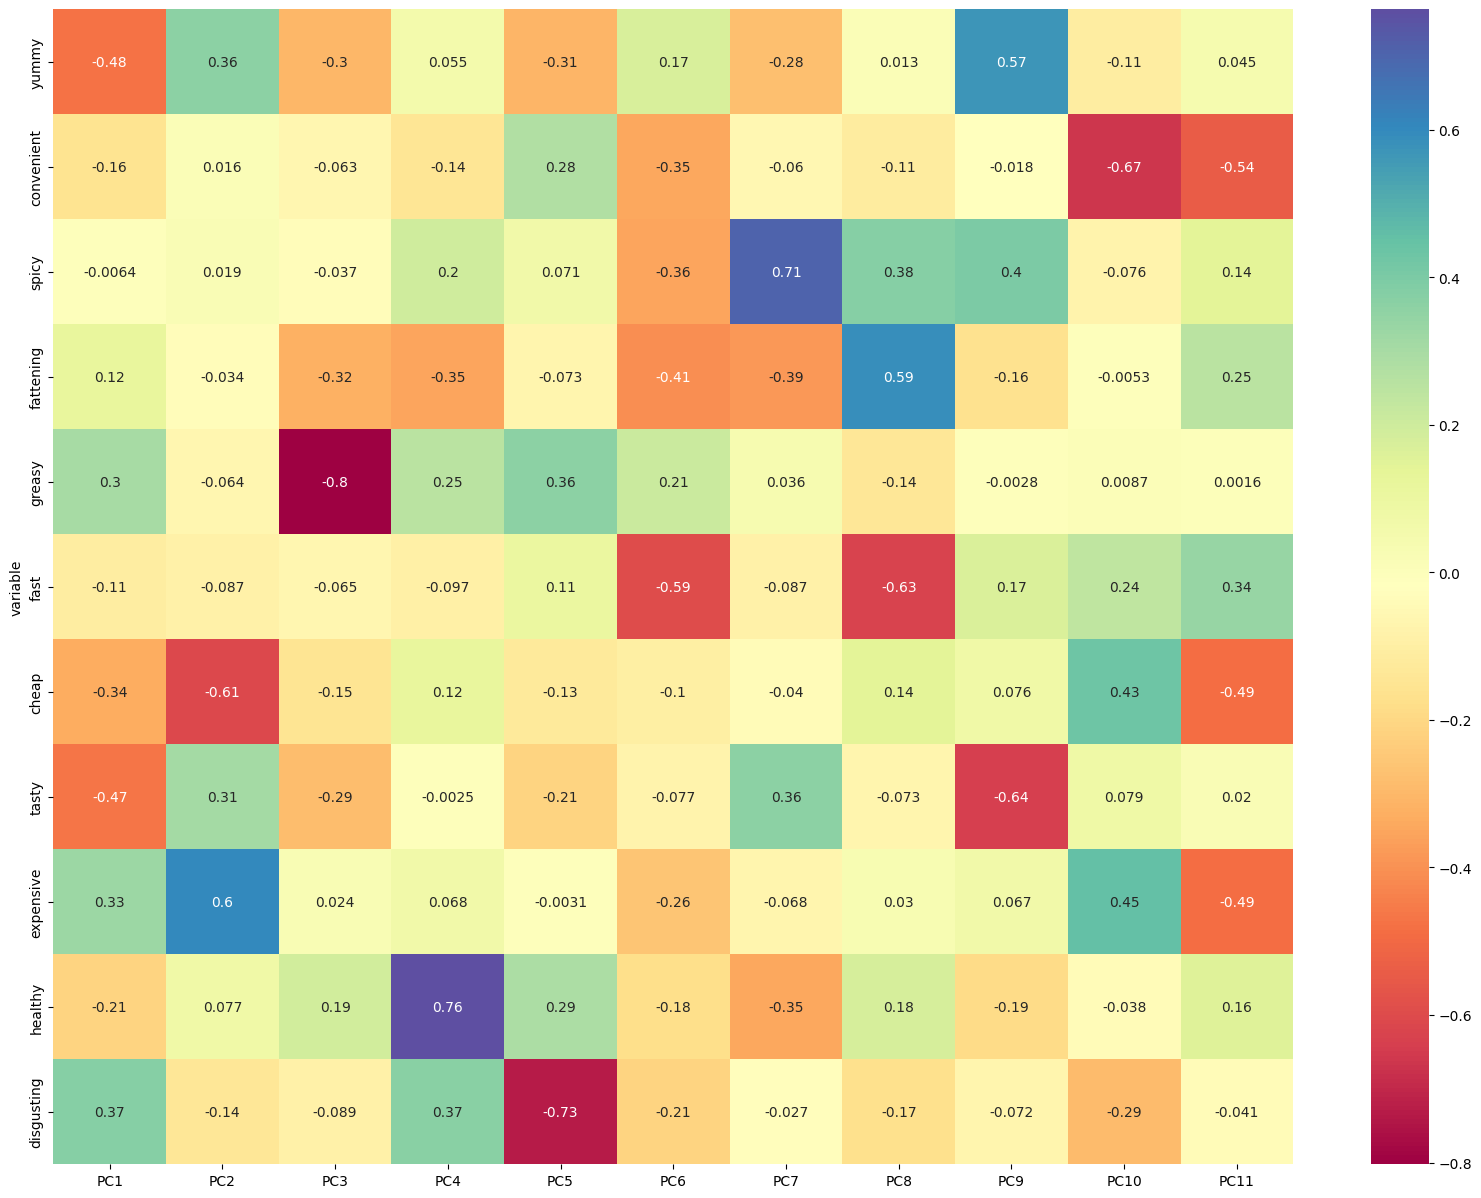

In [19]:
#Correlation matrix plot for loadings
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()


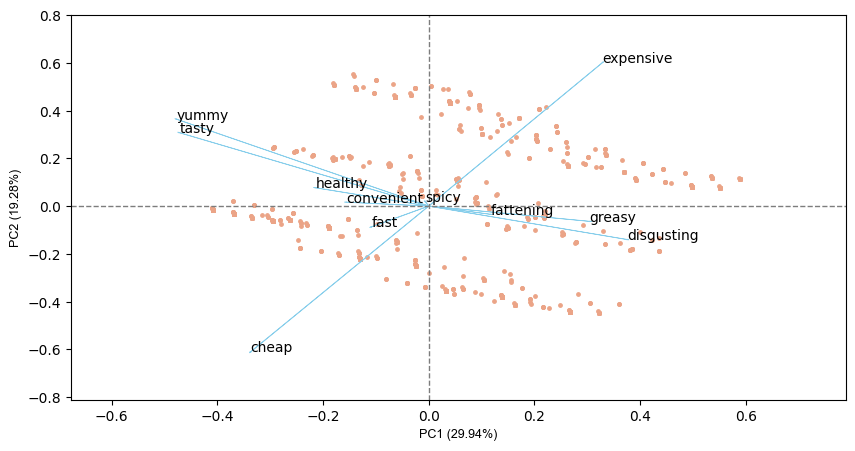

In [26]:
# get PC scores
pca_2 = PCA()
pca_scores = pca_2.fit_transform(sel_data)
# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=sel_data.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))
